Q1) The dataset is highly skewed toward the cities included in Delhi-NCR. 
So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. 

Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

Que 1 -Part 1)Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

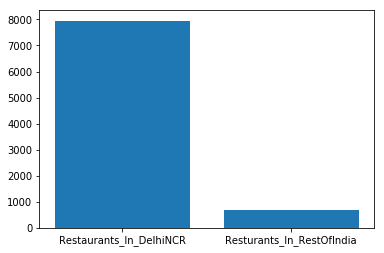

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding ="ISO-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df=df[(df.country_code==1)]
NCR=['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
ncr_count=0
rest=0

for i in range(df.shape[0]):
    if any(x in df.iloc[i,3] for x in NCR):
        ncr_count=ncr_count+1
    else:
        rest=rest+1

x=["Restaurants_In_DelhiNCR","Resturants_In_RestOfIndia"]
y=[ncr_count,rest]
pt.bar(x,y)
pt.show()

Que 1 - Part 2) Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np

iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding ="ISO-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df=df[(df.country_code==1)]
ncr=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]

d={}
for i in range(df.shape[0]):
    key=df.iloc[i,3]
    value=df.iloc[i,9]
    if key in d:
        d[key]=d[key]+","+value
    else:
        d[key]=value

ncr_l=[]
rest_l=[]
for i in d:
    if i in ncr:
        l1=d[i].split(",")
        for j in l1:
            ncr_l.append(j)
    else:
        l2=d[i].split(",")
        for j in l2:
            rest_l.append(j)

            
s1=set()
s2=set()
for i in ncr_l:
    i=i.strip()
    s1.add(i)
for i in rest_l:
    i=i.strip()
    s2.add(i)
ncr_l=list(s1)
rest_l=list(s2)

for i in rest_l:
    if i not in ncr_l:
        print(i)


BBQ
German
Malwani
Cajun


Que 1- Part 3) Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from IPython.display import display, Markdown
iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding="iso-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df=df[(df.country_code==1)]
ncr=["New Delhi","Ghaziabad","Noida","Gurgaon","Faridabad"]

#ncr calculation
cuisine_list_ncr=[]
for i in range(df.shape[0]):
    if df.iloc[i,3] in ncr:
        l=[]
        l.append(df.iloc[i,9])
        cuisine_list_ncr.append(l)
cuisines_ncr=[]
for i in cuisine_list_ncr:
    for j in i:
        l=j.split(",")
        for k in l:
            cuisines_ncr.append(k.strip())

df1=pd.DataFrame(cuisines_ncr)

vc=df1[0].value_counts()
keys=vc.keys().tolist()
values=vc.tolist()
display(Markdown('*Delhi NCR Top 10 Cuisines Vs No. of Restaurants*'))

for i in range(10):
    print(keys[i],end=' ')
    print(values[i])
    
#rest of india calculation
print()
cuisine_list_non_ncr=[]
for i in range(df.shape[0]):
    if df.iloc[i,3] not in ncr:
        l=[]
        l.append(df.iloc[i,9])
        cuisine_list_non_ncr.append(l)
cuisines_non_ncr=[]
display(Markdown('*Non Delhi NCR Top 10 Cuisines Vs No. of Restaurants*'))
for i in cuisine_list_non_ncr:
    for j in i:
        l=j.split(",")
        for k in l:
            cuisines_non_ncr.append(k.strip())

df2=pd.DataFrame(cuisines_non_ncr)

vc=df2[0].value_counts()
keys=vc.keys().tolist()
values=vc.tolist()
for i in range(10):
    print(keys[i],end=' ')
    print(values[i])


*Delhi NCR Top 10 Cuisines Vs No. of Restaurants*

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535



*Non Delhi NCR Top 10 Cuisines Vs No. of Restaurants*

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


Que1-Part4) Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

Que2) User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

Que 2-Part1) Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

a) Number of Votes given Restaurant

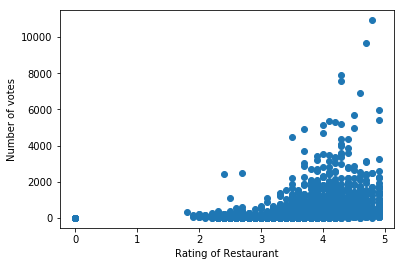

In [37]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from IPython.display import display, Markdown
iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding="iso-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

x=[]
y=[]
for i in range(df.shape[0]):
    x.append(df.iloc[i,17])
    y.append(df.iloc[i,20])

pt.scatter(x,y)
pt.xlabel("Rating of Restaurant")
pt.ylabel("Number of votes")
pt.show()

Que2-Part1-b) Restaurant serving more number of cuisines.

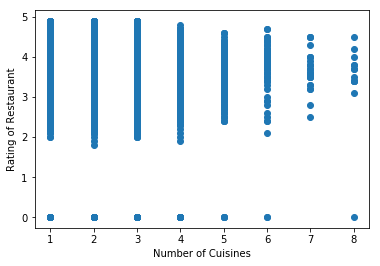

In [36]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from IPython.display import display, Markdown
iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding="iso-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
x=[]
y=[]
for i in range(df.shape[0]):
    s=str(df.iloc[i,9])
    
    x.append(len(s.split(",")))
    y.append(df.iloc[i,17])

pt.scatter(x,y)
pt.xlabel("Number of Cuisines")
pt.ylabel("Rating of Restaurant")
pt.show()

Que2 Part 1-c) Average Cost of Restaurant

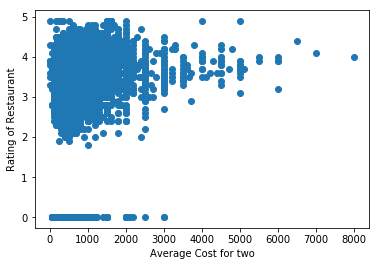

In [47]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
from IPython.display import display, Markdown
iris=pd.read_csv("D:\\Dropbox\\zomato.csv",encoding="iso-8859-1")
df=iris.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df=df[(df.country_code==1)]
x=[]
y=[]
for i in range(df.shape[0]):
    x.append(df.iloc[i,10])
    y.append(df.iloc[i,17])
pt.scatter(x,y)
pt.xlabel("Average Cost for two")
pt.ylabel("Rating of Restaurant")
pt.show()

Que 2- Part 1-d) Restaurant serving some specific cuisines.